In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy.stats import mannwhitneyu, ttest_ind, kruskal, ks_2samp
%matplotlib inline

## Data Description

## Trainsets

In [82]:
train_set1 = pd.read_csv('data/Fold1/train_cleaned.csv')
train_set2 = pd.read_csv('data/Fold2/train_cleaned.csv')
train_set3 = pd.read_csv('data/Fold3/train_cleaned.csv')
train_set4 = pd.read_csv('data/Fold4/train_cleaned.csv')
train_set5 = pd.read_csv('data/Fold5/train_cleaned.csv')

In [91]:
train_sets = [train_set1,train_set2,train_set3,train_set4,train_set5]

In [127]:
rel_values = pd.DataFrame()
for nb, dataset in enumerate(train_sets):
    rel_values = rel_values.append(pd.DataFrame({'DataSet':'TrainSet_{}'.format(nb+1),
                                                 'rel_0': dataset.rel.value_counts()[0],
                                                 'rel_1': dataset.rel.value_counts()[1],
                                                 'rel_2': dataset.rel.value_counts()[2],
                                                 'rel_3': dataset.rel.value_counts()[3],
                                                 'rel_4': dataset.rel.value_counts()[4],
                                                 }, index=[0]), ignore_index=True)
rel_values

,DataSet,rel_0,rel_1,rel_2,rel_3,rel_4
0,TrainSet_1,377957,232569,95082,12658,5146
1,TrainSet_2,373029,230368,95117,12814,5355
2,TrainSet_3,371725,232302,96663,12903,5518
3,TrainSet_4,372756,231727,96244,12712,5329
4,TrainSet_5,377322,231874,95247,12864,5295


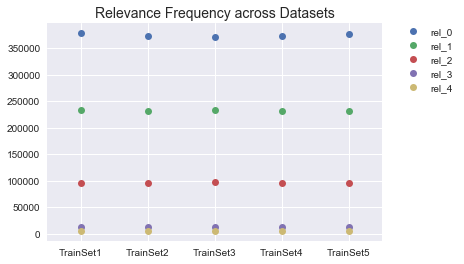

In [105]:
fig,ax = plt.subplots()
rel_values.plot(style='o', ax=ax)
plt.xlim(-.5,4.5)
group_labels = ['','TrainSet1','TrainSet2','TrainSet3','TrainSet4','TrainSet5','']
_=ax.set_xticklabels(group_labels)
_=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
_=plt.title('Relevance Frequency across Datasets', size=14)

### Moments for Relevance

In [110]:
moments = pd.DataFrame()
for nb, dataset in enumerate(train_sets):
    moments = moments.append(pd.DataFrame({'DataSet':'TrainSet_{}'.format(nb+1),
                                           'mean': dataset.rel.mean(),
                                           'median': dataset.rel.median(), 
                                           'skewness': dataset.rel.skew(),
                                           'kurtosis': dataset.rel.kurt(), 
                                           'var': dataset.rel.var(), 
                                           'std': dataset.rel.std()
                                          }, index=[0]),ignore_index=True)
moments

,DataSet,kurtosis,mean,median,skewness,std,var
0,TrainSet_1,1.209487,0.665307,0.0,1.182646,0.822127,0.675893
1,TrainSet_2,1.215933,0.670400,0.0,1.183436,0.826645,0.683342
2,TrainSet_3,1.197333,0.676403,0.0,1.174550,0.829133,0.687461
3,TrainSet_4,1.185632,0.672911,0.0,1.173109,0.826432,0.682989
4,TrainSet_5,1.221969,0.667228,0.0,1.186684,0.824866,0.680404


In [220]:
histo = pd.DataFrame()
histo['Relevance'] = [0,1,2,3,4]
for nb, dataset in enumerate(train_sets):
    histo['TrainSet_{}'.format(nb+1)] = [dataset.rel.value_counts()[x] for x in range(5)]
histo = histo.set_index('Relevance')    

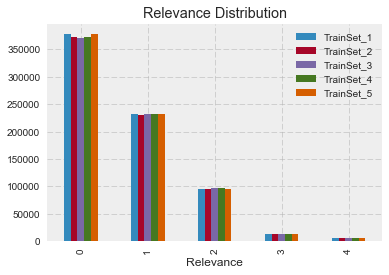

In [221]:
histo.plot(kind='bar', stacked=False)
plt.title("Relevance Distribution")

## Kolmogorov-Smirnov statistic on 2 samples

Ref: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ks_2samp.html

This is a two-sided test for the null hypothesis that 2 independent samples are drawn from the same continuous distribution. If the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same.

In [186]:
for i,x in enumerate(train_sets):
    pval_list = []
    for j,y in enumerate(train_sets): 
        if i == j:
            pass
        else:
            s,pval = ks_2samp(x['rel'],y['rel'])
            pval_list.append(pval)
    pval_avg = sum(pval_list)/len(pval_list)    
    
    if pval_avg > 0.05:
        answer = "SAME"
    else:
        answer = "Different"
    print("TrainSet"+str(i+1)+" vs All: KS-Test => AVG pvalue = "+str(pval_avg)+" "+str(answer))

TrainSet1 vs All: KS-Test => AVG pvalue = 0.259810386417 SAME
TrainSet2 vs All: KS-Test => AVG pvalue = 0.130519492972 SAME
TrainSet3 vs All: KS-Test => AVG pvalue = 0.0654058463335 SAME
TrainSet4 vs All: KS-Test => AVG pvalue = 0.103900135608 SAME
TrainSet5 vs All: KS-Test => AVG pvalue = 0.299433327929 SAME


In [225]:
small = pd.read_csv('data/Fold1/prediction_data/train_set_small_cleaned.csv')
large = pd.read_csv('data/Fold1/prediction_data/train_set_large_cleaned.csv')

In [230]:
used_sets = [small,large,train_set1]
used_sets_label = ['small','large','train_set1']

In [243]:
for nb, i in enumerate(used_sets):
    print(used_sets_label[nb])
    print((len(i)))
    print((len(i)/len(train_set1))*100)
    print(i.qid.nunique())
    print(i.rel.value_counts(normalize=True))
    print("\n")

small
12000
1.6588057704323402
104
0    0.519083
1    0.329583
2    0.120750
3    0.022250
4    0.008333
Name: rel, dtype: float64


large
24000
3.3176115408646805
192
0    0.466417
1    0.360917
2    0.143208
3    0.020167
4    0.009292
Name: rel, dtype: float64


train_set1
723412
100.0
6000
0    0.522464
1    0.321489
2    0.131435
3    0.017498
4    0.007114
Name: rel, dtype: float64




In [334]:
print(small.rel.value_counts(normalize=True)[0])

0.519083333333


In [353]:
new_sets = pd.DataFrame()
for nb in range(5):
    new_sets = new_sets.append(pd.DataFrame({
                                         'Small Set': small.rel.value_counts(normalize=True)[nb],
                                         'Large Set': large.rel.value_counts(normalize=True)[nb],
                                         'Fold_1 Set': train_set1.rel.value_counts(normalize=True)[nb]}, index=[0]),ignore_index=True)

In [354]:
new_sets.set_index('Relevance')

KeyError: 'Relevance'

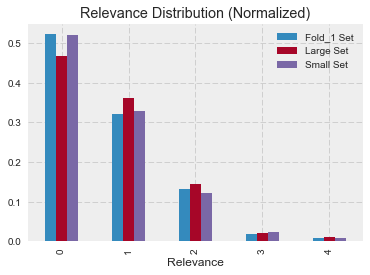

In [357]:
new_sets.plot(kind='bar', stacked=False)
plt.title("Relevance Distribution (Normalized)")
plt.xlabel("Relevance")

In [342]:
histo

,TrainSet_1,TrainSet_2,TrainSet_3,TrainSet_4,TrainSet_5
Relevance,,,,,
0,377957,373029,371725,372756,377322
1,232569,230368,232302,231727,231874
2,95082,95117,96663,96244,95247
3,12658,12814,12903,12712,12864
4,5146,5355,5518,5329,5295
